<h1 style='color:Red'> Stock Price Prediction </h1>

### Problem Statement

There are multiple variables in the dataset – date, open, high, low, last, close and turnover.

 - The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
 - High, Low and Last represent the maximum, minimum, and last price of the share for the day.
 - Another important thing to note is that the market is closed on weekends and public holidays.Notice the above table again, some date values are missing

 - The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target variable.

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Load and Read Dataset

In [2]:
df = pd.read_csv('stock.csv')
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600


## 3. Dataset Description / EDA

In [3]:
df.shape

(4392, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4392 non-null   object 
 1   Open       4392 non-null   float64
 2   High       4392 non-null   float64
 3   Low        4392 non-null   float64
 4   Close      4392 non-null   float64
 5   Adj_Close  4392 non-null   float64
 6   Volume     4392 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 223.1+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj_Close,Volume
count,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4.392000e+03
mean,30.562539,30.893618,30.238833,30.572580,30.572580,1.884027e+06
std,29.914758,30.210974,29.615761,29.905778,29.905778,1.621609e+06
min,3.296875,3.390625,3.000000,3.250000,3.250000,1.904000e+05
25%,8.718125,8.803125,8.625000,8.712500,8.712500,1.088800e+06
50%,14.766250,14.981250,14.662500,14.767500,14.767500,1.539300e+06
75%,42.546248,43.051249,42.086249,42.539999,42.539999,2.188900e+06
max,121.080002,121.750000,120.169998,121.360001,121.360001,4.641260e+07


In [6]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

In [7]:
df.drop('Adj_Close', axis=1, inplace= True)

### 3.1 Data Transformation

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['DayofWeek'] = df['Date'].dt.dayofweek

In [9]:
a= pd.get_dummies(df['DayofWeek'], drop_first=True, prefix='DayofWeek')
a

,DayofWeek_1,DayofWeek_2,DayofWeek_3,DayofWeek_4
0,0,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
4387,0,0,0,1
4388,1,0,0,0
4389,0,1,0,0
4390,0,0,1,0


In [10]:
df = pd.concat([df,a], axis=1)
df

,Date,Open,High,Low,Close,Volume,DayofWeek,DayofWeek_1,DayofWeek_2,DayofWeek_3,DayofWeek_4
0,2000-03-27,3.812500,4.156250,3.812500,4.125000,3675600,0,0,0,0,0
1,2000-03-28,4.125000,4.125000,4.000000,4.015625,1077600,1,1,0,0,0
2,2000-03-29,4.000000,4.031250,3.953125,4.000000,437200,2,0,1,0,0
3,2000-03-30,4.000000,4.000000,3.843750,3.843750,1883600,3,0,0,1,0
4,2000-03-31,3.734375,3.734375,3.390625,3.390625,7931600,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4387,2017-09-01,113.790001,114.099998,112.790001,113.309998,950000,4,0,0,0,1
4388,2017-09-05,112.519997,113.529999,111.160004,111.870003,1805200,1,1,0,0,0
4389,2017-09-06,112.029999,112.489998,110.250000,112.230003,2136700,2,0,1,0,0
4390,2017-09-07,112.459999,112.900002,112.000000,112.339996,1251600,3,0,0,1,0


In [11]:
df.isna().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
DayofWeek      0
DayofWeek_1    0
DayofWeek_2    0
DayofWeek_3    0
DayofWeek_4    0
dtype: int64

In [12]:
df.describe()

,Open,High,Low,Close,Volume,DayofWeek,DayofWeek_1,DayofWeek_2,DayofWeek_3,DayofWeek_4
count,4392.000000,4392.000000,4392.000000,4392.000000,4.392000e+03,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000
mean,30.562539,30.893618,30.238833,30.572580,1.884027e+06,2.021858,0.204690,0.205601,0.201503,0.200364
std,29.914758,30.210974,29.615761,29.905778,1.621609e+06,1.399637,0.403521,0.404186,0.401168,0.400319
min,3.296875,3.390625,3.000000,3.250000,1.904000e+05,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.718125,8.803125,8.625000,8.712500,1.088800e+06,1.000000,0.000000,0.000000,0.000000,0.000000
50%,14.766250,14.981250,14.662500,14.767500,1.539300e+06,2.000000,0.000000,0.000000,0.000000,0.000000
75%,42.546248,43.051249,42.086249,42.539999,2.188900e+06,3.000000,0.000000,0.000000,0.000000,0.000000
max,121.080002,121.750000,120.169998,121.360001,4.641260e+07,4.000000,1.000000,1.000000,1.000000,1.000000


### 3.2 Data Cleaning

In [13]:
df.drop(['Date','DayofWeek', 'Volume'], axis=1, inplace=True)

In [14]:
df.shape

(4392, 8)

### 3.3 Outlier Remove

In [15]:
df

,Open,High,Low,Close,DayofWeek_1,DayofWeek_2,DayofWeek_3,DayofWeek_4
0,3.812500,4.156250,3.812500,4.125000,0,0,0,0
1,4.125000,4.125000,4.000000,4.015625,1,0,0,0
2,4.000000,4.031250,3.953125,4.000000,0,1,0,0
3,4.000000,4.000000,3.843750,3.843750,0,0,1,0
4,3.734375,3.734375,3.390625,3.390625,0,0,0,1
...,...,...,...,...,...,...,...,...
4387,113.790001,114.099998,112.790001,113.309998,0,0,0,1
4388,112.519997,113.529999,111.160004,111.870003,1,0,0,0
4389,112.029999,112.489998,110.250000,112.230003,0,1,0,0
4390,112.459999,112.900002,112.000000,112.339996,0,0,1,0


#### Before

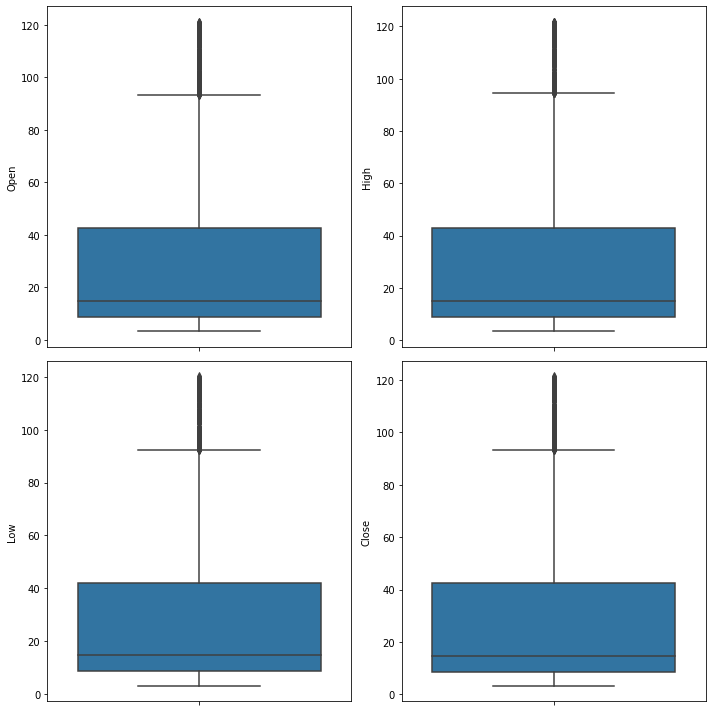

In [16]:
plt.figure(figsize=(10,10))
plotnumber = 1

for col in df.columns:
    if plotnumber <5:
        ax = plt.subplot(2,2, plotnumber)
        sns.boxplot(y=df[col])
    plotnumber +=1
plt.tight_layout()

In [17]:
df.drop(df[df['Close'] >70].index, inplace = True)

In [18]:
df.shape

(3821, 8)

#### After

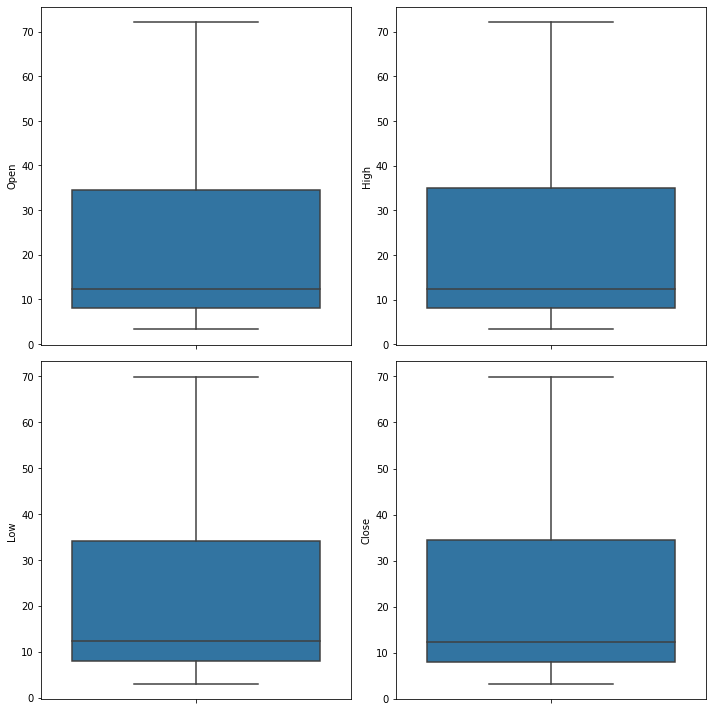

In [19]:
plt.figure(figsize=(10,10))
plotnumber = 1

for col in df.columns:
    if plotnumber <5:
        ax = plt.subplot(2,2, plotnumber)
        sns.boxplot(y=df[col])
    plotnumber +=1
plt.tight_layout()

### 3.4 Data Visualisation

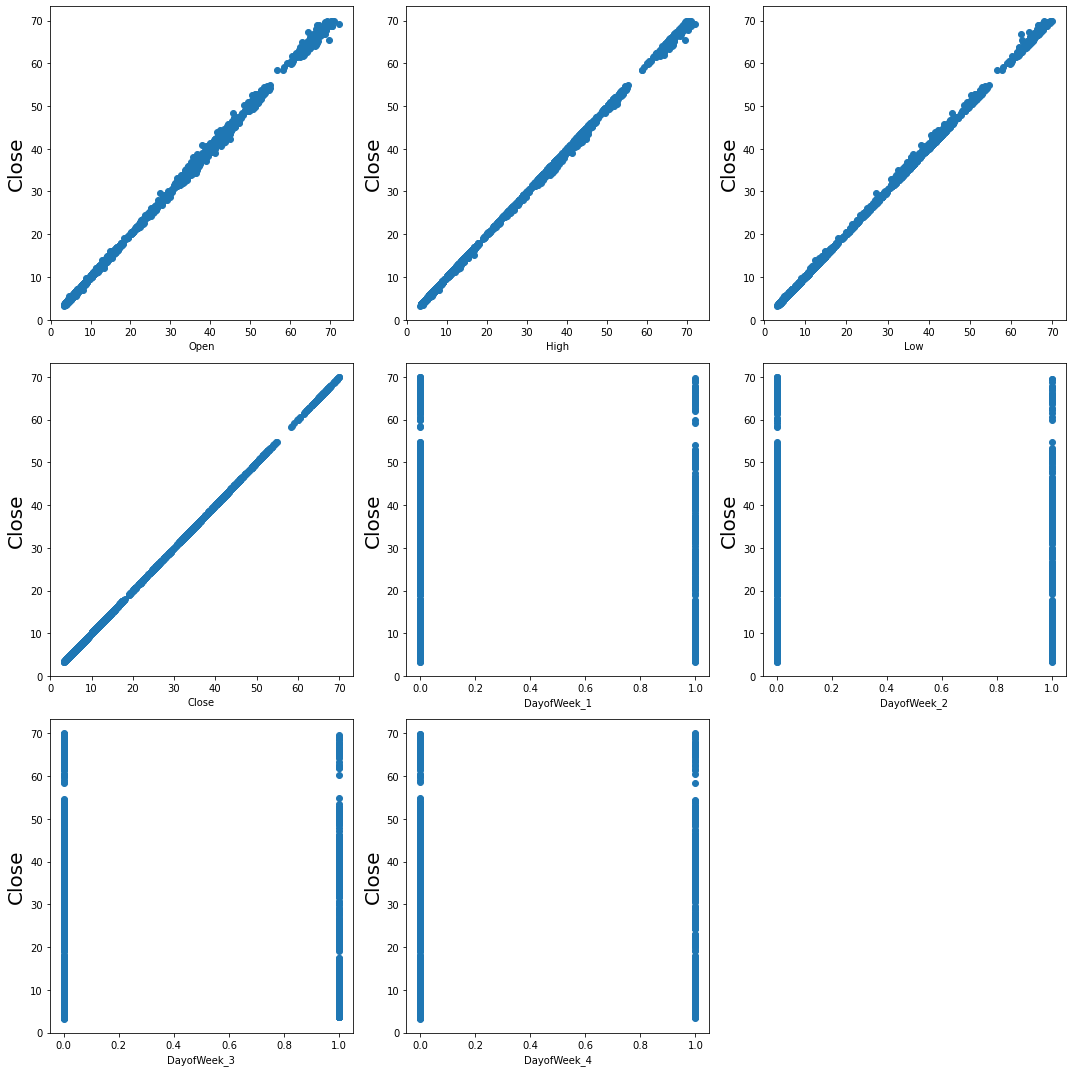

In [20]:
plotnumber = 1
plt.figure(figsize=(15,15), facecolor='white')

for col in df.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3,3,plotnumber)
        plt.scatter(x=df[col], y=df['Close'])
        plt.xlabel(col, fontsize=10)
        plt.ylabel('Close', fontsize=20)
    plotnumber += 1
plt.tight_layout()

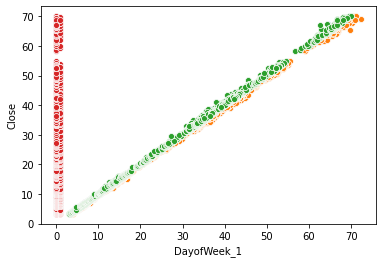

In [21]:
sns.scatterplot(x='Open', y='Close', data=df)
sns.scatterplot(x='High', y='Close', data=df)
sns.scatterplot(x='Low', y='Close', data=df)
sns.scatterplot(x='DayofWeek_1', y='Close', data=df)

## 4. Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Close',axis =1),
                                                   df['Close'], test_size=0.3, random_state = 79)

## 5. Model Building

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
predicts = model.predict(X_test)

In [26]:
model.score(X_train,y_train)

0.9998702032112387

## 6. Model Evaluation

In [27]:
model.score(X_test, y_test)

0.9999046489256462

In [28]:
from sklearn.metrics import r2_score
score = r2_score(predicts, y_test)
score

0.9999047304407532